In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [34]:
df = pd.read_csv('Data.csv')
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [35]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,Favorite Color,object,3,0,"[Cool, Warm, Neutral]",4
1,Favorite Music Genre,object,7,0,"[Rock, Pop, Hip hop, Electronic, R&B and soul,...",4
2,Favorite Beverage,object,6,0,"[Doesn't drink, Beer, Other, Wine, Vodka, Whis...",4
3,Favorite Soft Drink,object,4,0,"[Coca Cola/Pepsi, Fanta, 7UP/Sprite, Other]",4
4,Gender,object,2,0,"[F, M]",4


In [36]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.duplicated().sum()

0

In [39]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

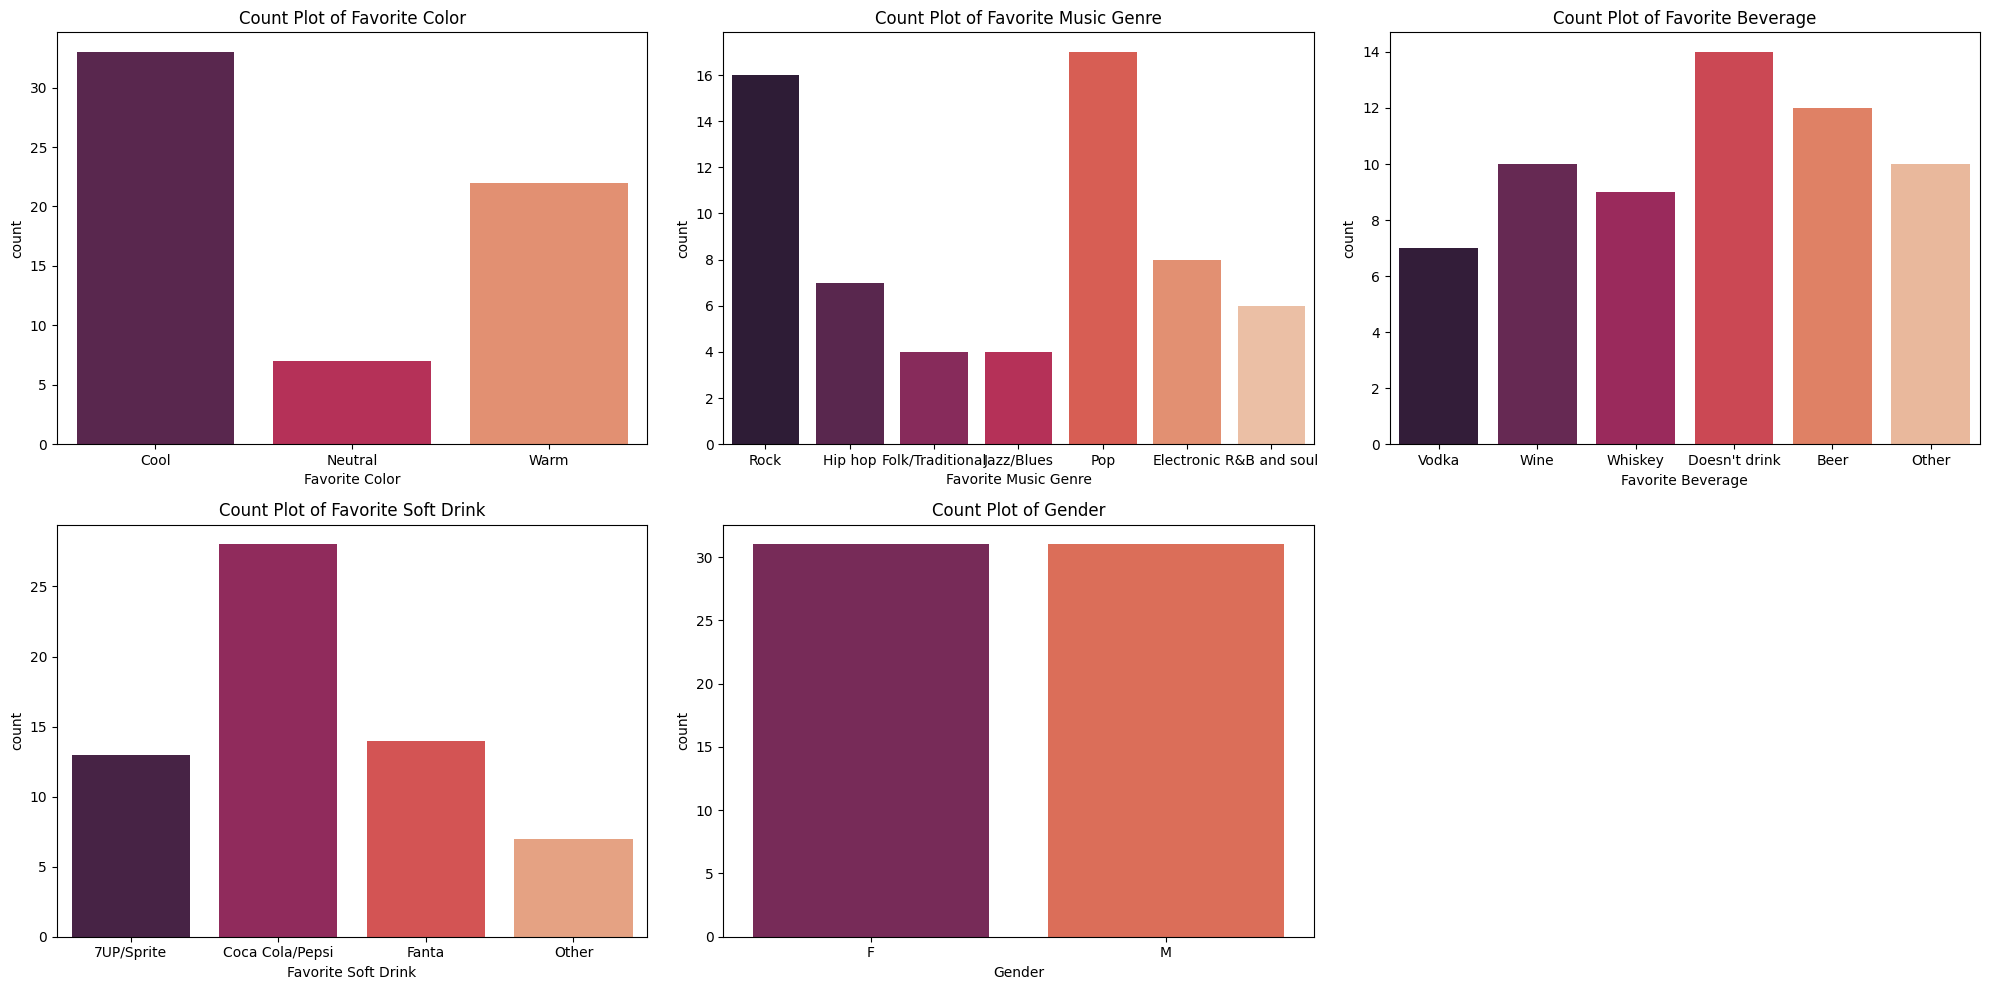

In [40]:
cleaner.categorical_plot(df,df.columns,7)

In [41]:
cleaner.continuous_plot(df,df.columns,7)

Column 'Favorite Color' is not countinuous.
Column 'Favorite Music Genre' is not countinuous.
Column 'Favorite Beverage' is not countinuous.
Column 'Favorite Soft Drink' is not countinuous.
Column 'Gender' is not countinuous.


<Figure size 2000x1000 with 0 Axes>

In [42]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
59,Cool,Pop,Whiskey,Other,M
60,Cool,Electronic,Whiskey,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


All columns are categorical

In [43]:
x=df.drop('Gender',axis=1)
y=df['Gender']

In [44]:
y=y.map({'M':1,'F':0})

In [45]:
x = pd.get_dummies(x, columns=x.columns, drop_first=True,dtype=int)

In [46]:
x

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
60,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
63,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
64,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


Logisitic regression

In [47]:
x.isna().sum()

Favorite Color_Neutral                   0
Favorite Color_Warm                      0
Favorite Music Genre_Folk/Traditional    0
Favorite Music Genre_Hip hop             0
Favorite Music Genre_Jazz/Blues          0
Favorite Music Genre_Pop                 0
Favorite Music Genre_R&B and soul        0
Favorite Music Genre_Rock                0
Favorite Beverage_Doesn't drink          0
Favorite Beverage_Other                  0
Favorite Beverage_Vodka                  0
Favorite Beverage_Whiskey                0
Favorite Beverage_Wine                   0
Favorite Soft Drink_Coca Cola/Pepsi      0
Favorite Soft Drink_Fanta                0
Favorite Soft Drink_Other                0
dtype: int64

In [48]:
y.isna().sum()

0

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [51]:
log.score(x_train,y_train)

0.7959183673469388

In [52]:
log.score(x_test,y_test)

0.46153846153846156

In [53]:
y_pred_test=log.predict(x_test)
y_pred_train=log.predict(x_train)

In [54]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [55]:
print(mse_test)
print(mse_train)

0.5384615384615384
0.20408163265306123


KNN Classifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
knn.score(x_train,y_train)

0.7755102040816326

In [59]:
knn.score(x_test,y_test)

0.6923076923076923

In [60]:
y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [61]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [62]:
print(mse_test)
print(mse_train)

0.3076923076923077
0.22448979591836735


DTClassifier

In [64]:
DTC = DecisionTreeClassifier(max_depth=5,random_state=42,max_features=3)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=3, random_state=42)

In [65]:
DTC.score(x_train,y_train)

0.7755102040816326

In [66]:
DTC.score(x_test,y_test)

0.6153846153846154

In [67]:
y_pred_test=DTC.predict(x_test)
y_pred_train=DTC.predict(x_train)

In [68]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [69]:
print(mse_test)
print(mse_train)

0.38461538461538464
0.22448979591836735


Using GridSearch CV

In [71]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'] }

In [72]:
DTC = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(DTC, param_grid, cv=5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [73]:
model.score(x_train,y_train)

0.7959183673469388

In [74]:
model.score(x_test,y_test)

0.6153846153846154

In [76]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [77]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=2, random_state=42, splitter='random')

In [78]:
model.best_score_

0.6533333333333333

RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
rfc.score(x_train,y_train)

0.9591836734693877

In [81]:
rfc.score(x_test,y_test)

0.6923076923076923

In [82]:
y_pred_test=rfc.predict(x_test)
y_pred_train=rfc.predict(x_train)

In [83]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [84]:
print(mse_test)
print(mse_train)

0.3076923076923077
0.04081632653061224
